/tmp/ipykernel_4223/3517405454.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([x_optimal_initial, x_optimal_initial], [y_optimal_initial, (compensated_income - new_price1*x_optimal_initial)/price2], 'bo-', linestyle='dashed')
/tmp/ipykernel_4223/3517405454.py:54: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([x_optimal_initial, x_optimal_new], [(compensated_income - new_price1*x_optimal_initial)/price2, y_optimal_new], 'ro-', linestyle='dashed')


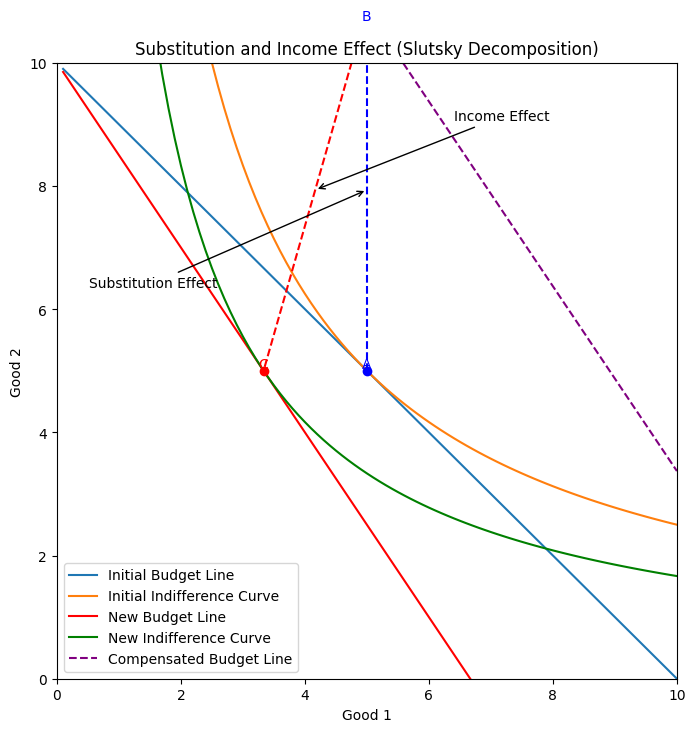

In [19]:
import matplotlib.pyplot as plt
import numpy as np

u = 10  # level of utility
p1 = 2  # price of good 1
p2 = 3  # price of good 2
M = 50  # income

# Create a grid of points
x1 = np.linspace(0, M/p1, 100)
x2 = np.linspace(0, M/p2, 100)
zy
# Plot the budget line
plt.plot(M/p1 - x1*(p1/p1), label='Budget Line')

# Plot the indifference curve
plt.plot(u*np.ones_like(x1), label='Indifference Curve')

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Graphical Representation of the Minimization Problem (Case 1)')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_budget_utility(p1, p2, u_bar):
    # Define x1 and x2 arrays
    x1 = np.linspace(0, 10, 200)
    x2 = np.linspace(0, 10, 200)

    # Define the utility function
    def u(x1, x2):
        return np.minimum(x1, x2)

    # Compute budget line
    B = (p1 * x1 + p2 * x2_star, p1 * x1_star + p2 * x2)

    # Create the plot
    plt.figure(figsize=(8, 8))
    plt.plot(x1, u(x1, x2), label='Utility = min(x1, x2)')
    plt.plot(x1, B, label='Budget line: p1x1+p2x2')

    # Compute x1* and x2* according to different cases
    if p1 > p2:    # Case: p1 > p2
        x1_star = u_bar
        x2_star = u_bar
    else:          # Case: p1 < p2
        x1_star = u_bar
        x2_star = u_bar

    plt.scatter(x1_star, x2_star, color='red')  # Plot optimal bundle
    plt.xlabel('Good 1')
    plt.ylabel('Good 2')
    plt.title(f'Case: p1={p1}, p2={p2}, u_bar={u_bar}')
    plt.legend()
    plt.show()

# Define prices and utility level
p1_values = [2, 0.5]  # > and < than p2
p2 = 1
u_bar = 5

# Call the function for each case
for p1 in p1_values:
    plot_budget_utility(p1, p2, u_bar)


UnboundLocalError: local variable 'x2_star' referenced before assignment

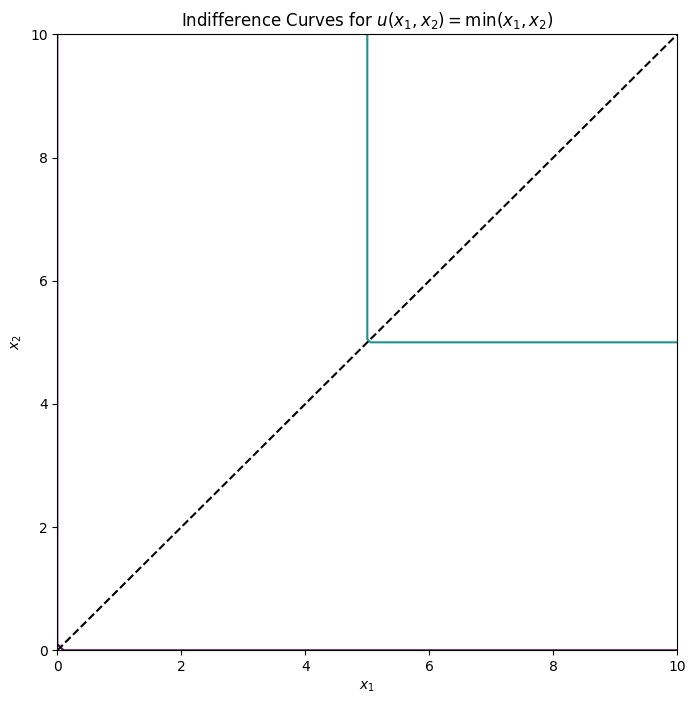

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0,10,100)
x2 = np.linspace(0,10,100)

X1, X2 = np.meshgrid(x1, x2)

U = np.minimum(X1, X2)
plt.figure(figsize=(8,8))
plt.contour(X1, X2, U, levels=1)
plt.plot(x1, x1, '--k') # Add 45-degree line
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Indifference Curves for $u(x_1,x_2)=\min(x_1,x_2)$')
plt.show()


/tmp/ipykernel_17625/1138402155.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, U, levels=1, colors='black', label='Utility Function')


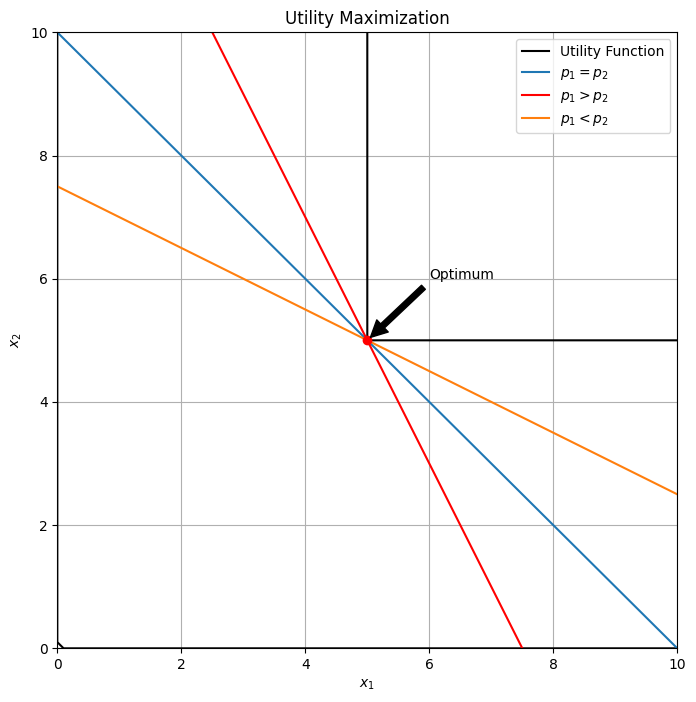

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0,10,100)
x2 = np.linspace(0,10,100)

X1, X2 = np.meshgrid(x1, x2)

U = np.minimum(X1, X2)
#坐标轴范围0-10 

plt.figure(figsize=(8,8))
plt.contour(X1, X2, U, levels=1, colors='black', label='Utility Function')
# 只绘制U=5的等效线
plt.plot(x1[x1==5], x2[x1==5], color='black', label='Utility Function')
# 绘制p1=1,p2=1的预算线
plt.plot(x1, 10-x1, label='$p_1=p_2$')
#绘制p1=1,p2=0.5的预算线(只绘制不小于0的部分)
plt.plot(x1[x1>=0], 15-2*x1[x1>=0], label='$p_1>p_2$', color='red')
#绘制p1=2,p2=1的预算线(只绘制不小于0的部分)
plt.plot(x1[x1>=0], 7.5-0.5*x1[x1>=0], label='$p_1<p_2$')
# 标出最优解(让点在最上层)
plt.scatter(5, 5, color='red', zorder=3)
#在最优点旁边标注英文”Optimum“
plt.annotate('Optimum', xy=(5, 5), xytext=(6, 6), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(0, 10)
plt.ylim(0, 10)
#标注各图线的名称
plt.legend()
plt.title('Utility Maximization')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

/tmp/ipykernel_17625/3481518166.py:16: RuntimeWarning: invalid value encountered in sqrt
  x2_u = np.sqrt(u - x1**2)


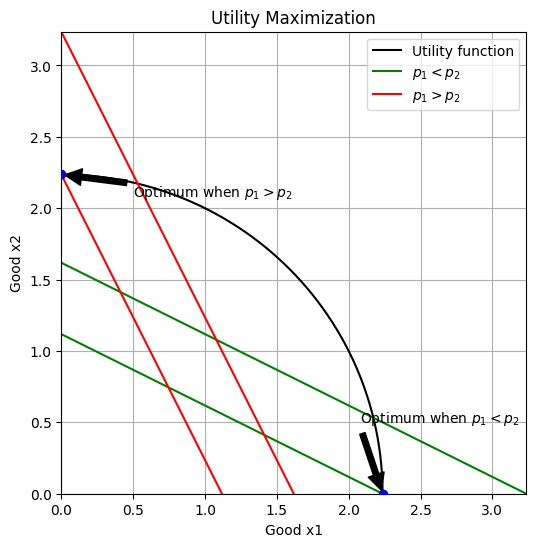

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# define utility level
u = 5

# define prices and income
p1 = 1
p2 = 2
M = np.sqrt(u)

# define the range of good x1
x1 = np.linspace(0, np.sqrt(u)+2, 100000)

# utility function
x2_u = np.sqrt(u - x1**2)

# budget line
x2_b = (M - p1*x1) / p2
x2_b2 = (M+1 - p1*x1) / p2

p11=2
p21=1

x2_c = (M - p11*x1) / p21
x2_c2 = (M+1 - p11*x1) / p21
plt.figure(figsize=(6,6))

# plot utility function
plt.plot(x1, x2_u, label='Utility function', color='black')

# plot budget line
plt.plot(x1, x2_b, label='$p_1<p_2$',color='green')
plt.plot(x1, x2_b2, color='green')
plt.plot(x1, x2_c, label='$p_1>p_2$',color='red')
plt.plot(x1, x2_c2, color='red')
plt.scatter(np.sqrt(u), 0, color='blue', zorder=3)
plt.annotate('Optimum when $p_1<p_2$', xy=(np.sqrt(u), 0), xytext=(np.sqrt(u/2)+0.5, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter(0, np.sqrt(u), color='blue', zorder=3)
plt.annotate('Optimum when $p_1>p_2$', xy=(0, np.sqrt(u)), xytext=(0.5, np.sqrt(u/2)+0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim(0, np.sqrt(u)+1)
plt.ylim(0, np.sqrt(u)+1)
plt.xlabel('Good x1')
plt.ylabel('Good x2')
plt.title('Utility Maximization')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Define the utility functions
def u(x1, x2):
    return np.minimum(x1, x2)

def u2(x1, x2):
    return x1**2 + x2**2

# Define the expenditure
def e(p1, p2, x1, x2):
    return p1*x1 + p2*x2


In [33]:
# Price conditions
p1_gt_p2 = (3, 1)
p1_lt_p2 = (1, 3)
p1_eq_p2 = (2, 2)

# Utility level
u_bar = 5


Text(0.5, 1.0, 'p1 = p2')

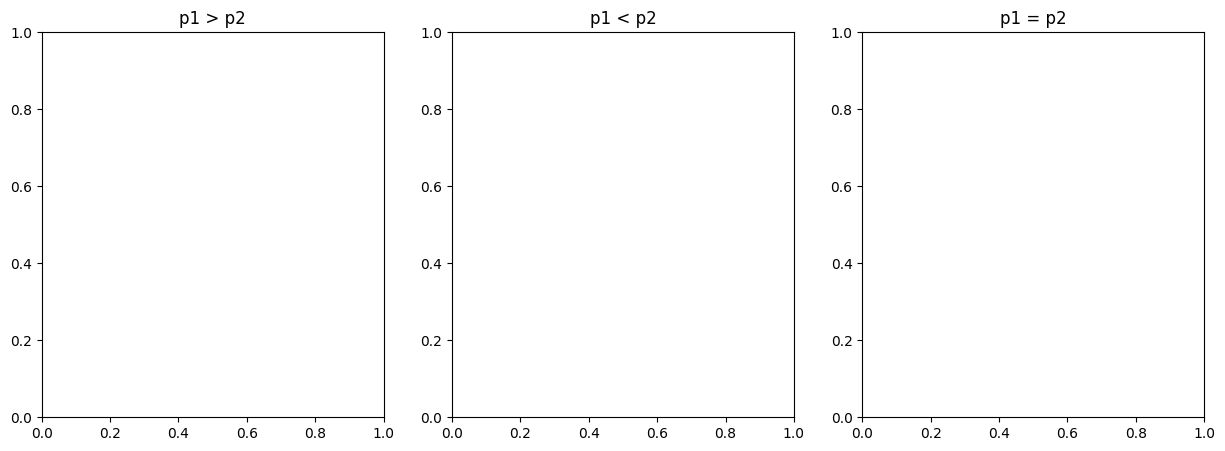

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title("p1 > p2")
ax[1].set_title("p1 < p2")
ax[2].set_title("p1 = p2")


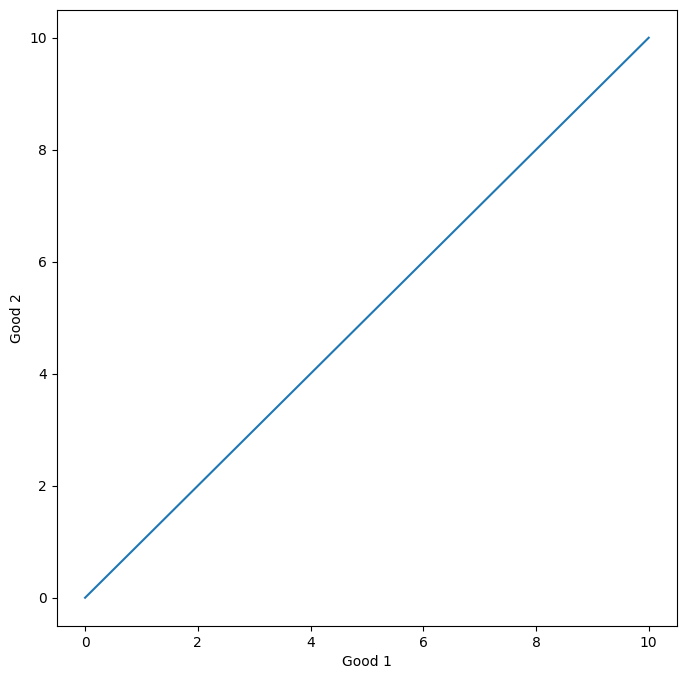

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_budget_utility(p1, p2, u_bar):
    # Define x1 and x2 arrays
    x1 = np.linspace(0, 10, 200)
    x2 = np.linspace(0, 10, 200)

    # Define the utility function
    def u(x1, x2):
        return np.minimum(x1, x2)

    # Compute budget line
    B = (p1 * x1 + p2 * x2_star, p1 * x1_star + p2 * x2)

    # Create the plot
    plt.figure(figsize=(8, 8))
    plt.plot(x1, u(x1, x2), label='Utility = min(x1, x2)')
    plt.plot(x1, B, label='Budget line: p1x1+p2x2')

    # Compute x1* and x2* according to different cases
    if p1 > p2:    # Case: p1 > p2
        x1_star = u_bar
        x2_star = u_bar
    else:          # Case: p1 < p2
        x1_star = u_bar
        x2_star = u_bar

    plt.scatter(x1_star, x2_star, color='red')  # Plot optimal bundle
    plt.xlabel('Good 1')
    plt.ylabel('Good 2')
    plt.title(f'Case: p1={p1}, p2={p2}, u_bar={u_bar}')
    plt.legend()
    plt.show()

# Define prices and utility level
p1_values = [2, 0.5]  # > and < than p2
p2 = 1
u_bar = 5

# Call the function for each case
for p1 in p1_values:
    plot_budget_utility(p1, p2, u_bar)


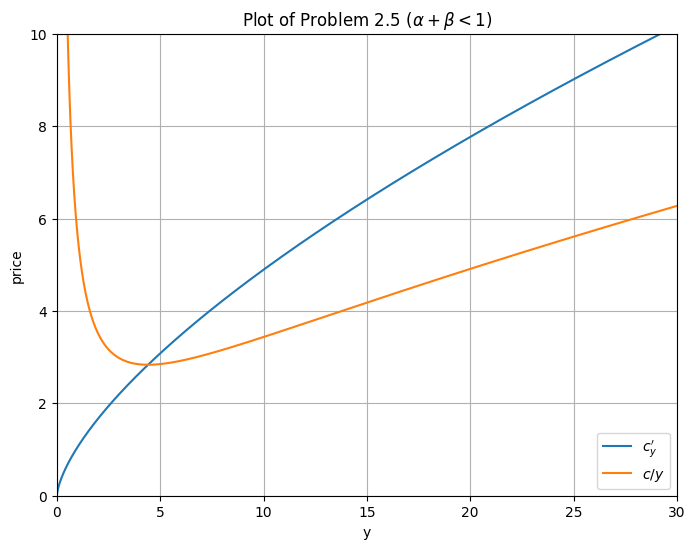

In [56]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.3
beta = 0.3
s = 0.5
F_bar = 10
gamma = 0.3  # Assuming some value for gamma
A = lambda F: F  # Assuming A(F) = F
w = 1  # Assuming some value for w
r = 1 # Assuming some value for r

def c_y_prime(y):
    part1 = y ** ((1 - (alpha + beta)) / (alpha + beta)) / (alpha + beta)
    part2 = (1 / A(F_bar) ** gamma) ** (1 / (alpha + beta))
    part3 = w * ((beta / alpha) * (w / r)) ** (-beta / (alpha + beta)) + r * ((beta / alpha) * (w / r)) ** (alpha / (alpha + beta))
    return part1 * part2 * part3

def c_over_y(y):
    part1 = y ** ((1 - (alpha + beta)) / (alpha + beta))
    part2 = (1 / A(F_bar) ** gamma) ** (1 / (alpha + beta))
    part3 = w * ((beta / alpha) * (w / r)) ** (-beta / (alpha + beta)) + r * ((beta / alpha) * (w / r)) ** (alpha / (alpha + beta))
    part4 = s * F_bar / y
    return part1 * part2 * part3 + part4

y_values = np.linspace(0.001, 50, 100000)
c_y_prime_values = np.vectorize(c_y_prime)(y_values)
c_over_y_values = np.vectorize(c_over_y)(y_values)

plt.figure(figsize=(8, 6))
plt.plot(y_values, c_y_prime_values, label="$c_y^\prime$")
plt.plot(y_values, c_over_y_values, label="$c/y$")
plt.xlim(0, 30)
plt.ylim(0, 10)
plt.xlabel("y")
plt.ylabel("price")
plt.legend()
plt.title("Plot of Problem 2.5 ($ \\alpha + \\beta <1 $)")
plt.grid(True)
plt.show()


In [18]:
from sympy import symbols, diff, solve
from sympy import latex

# Define the symbols
w, r, s, y, L, K, A, alpha, beta, gamma, F_bar, lamda = symbols('w r s y L K A alpha beta gamma F_bar lamda')

# Production function
y = A * L**alpha * K**beta * F_bar**gamma

# Cost function
C = w*L + r*K + s*F_bar - lamda*(y - F_bar)

# First order conditions
foc_L = diff(C, L)
foc_K = diff(C, K)
print(foc_L)

# Solve the first order conditions
# L_star = solve(foc_L, L)[0]
# K_star = solve(foc_K, K)[0]


-A*F_bar**gamma*K**beta*L**alpha*alpha*lamda/L + w


In [33]:
from sympy import symbols, diff, solve, lambdify
from sympy import latex
import matplotlib.pyplot as plt
import numpy as np
import sympy
# Define the symbols
w, r, s, y, F_bar, A, alpha, beta, gamma, L, K, lam = symbols('w r s y F_bar A alpha beta gamma L K lam')

# Define the production function

# Define the cost function
C = w*L + r*K

# Define the Lagrangian
Lagrangian = w*L + r*K + s*F_bar + lam * (y - A * L**alpha * K**beta * F_bar**gamma)

# Compute the first order conditions
foc_L = diff(Lagrangian, L)
foc_K = diff(Lagrangian, K)
print(latex(foc_L))
print(latex(foc_K))
# Solve the first order conditions for L and K
sol = solve({foc_L, foc_K}, {L, K})
print(latex(sol))
# tmp=sol_K/sol_L
# tmp= sympy.simplify(tmp)
# # Print the solutions
# print(latex(sol_L))
# print(latex(sol_K))
# print(latex(tmp))


- \frac{A F_{bar}^{\gamma} K^{\beta} L^{\alpha} \alpha lam}{L} + w
- \frac{A F_{bar}^{\gamma} K^{\beta} L^{\alpha} \beta lam}{K} + r


NotImplementedError: could not solve A*F_bar**gamma*L**alpha*beta*lam*((L**(1 - alpha)*w/(A*F_bar**gamma*alpha*lam))**(1/beta))**(beta - 1) - r

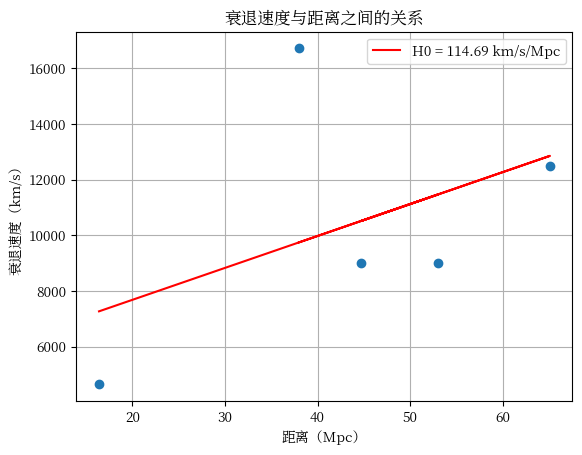

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mplfonts import use_font

use_font('Noto Serif CJK SC')#指定中文字体
# 数据
distances_Mpc = [16.4, 53.0, 44.7, 65.1, 38.0]
velocities_kmps = [4637.7, 8990.3, 8990.3, 12500.0, 16708.9]

# 绘制图形
plt.scatter(distances_Mpc, velocities_kmps)
plt.xlabel("距离（Mpc）")
plt.ylabel("衰退速度（km/s）")
plt.title("衰退速度与距离之间的关系")
plt.grid(True)

# 线性拟合
fit_params = np.polyfit(distances_Mpc, velocities_kmps, 1)
H0 = fit_params[0]
plt.plot(distances_Mpc, np.polyval(fit_params, distances_Mpc), color='red', label=f'H0 = {H0:.2f} km/s/Mpc')

plt.legend()
plt.show()

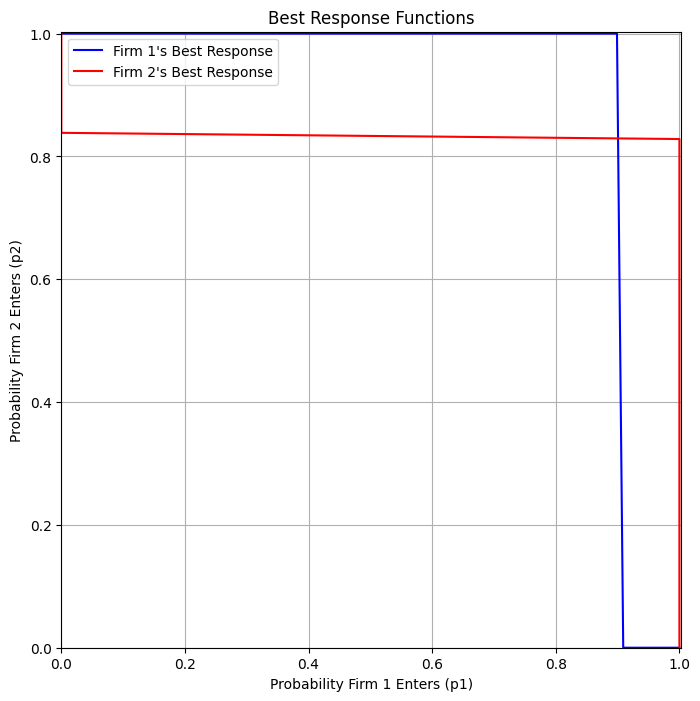

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of probabilities
p = np.linspace(0, 1, 100)

# Best response functions
br_firm1 = np.where(p < 10/11, 1, 0)
br_firm2 = np.where(p < 5/6 , 1, 0)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(p, br_firm1, label="Firm 1's Best Response", color='blue')
plt.plot(br_firm2, p, label="Firm 2's Best Response", color='red')
plt.xlabel("Probability Firm 1 Enters (p1)")
plt.ylabel("Probability Firm 2 Enters (p2)")
plt.title("Best Response Functions")
plt.xlim(0, 1.003)
plt.ylim(0, 1.003)
plt.legend()
plt.grid(True)
plt.show()
